In [55]:
import numpy as np
import pandas as pd

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
df = pd.read_csv('penguins_size.csv')
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [59]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

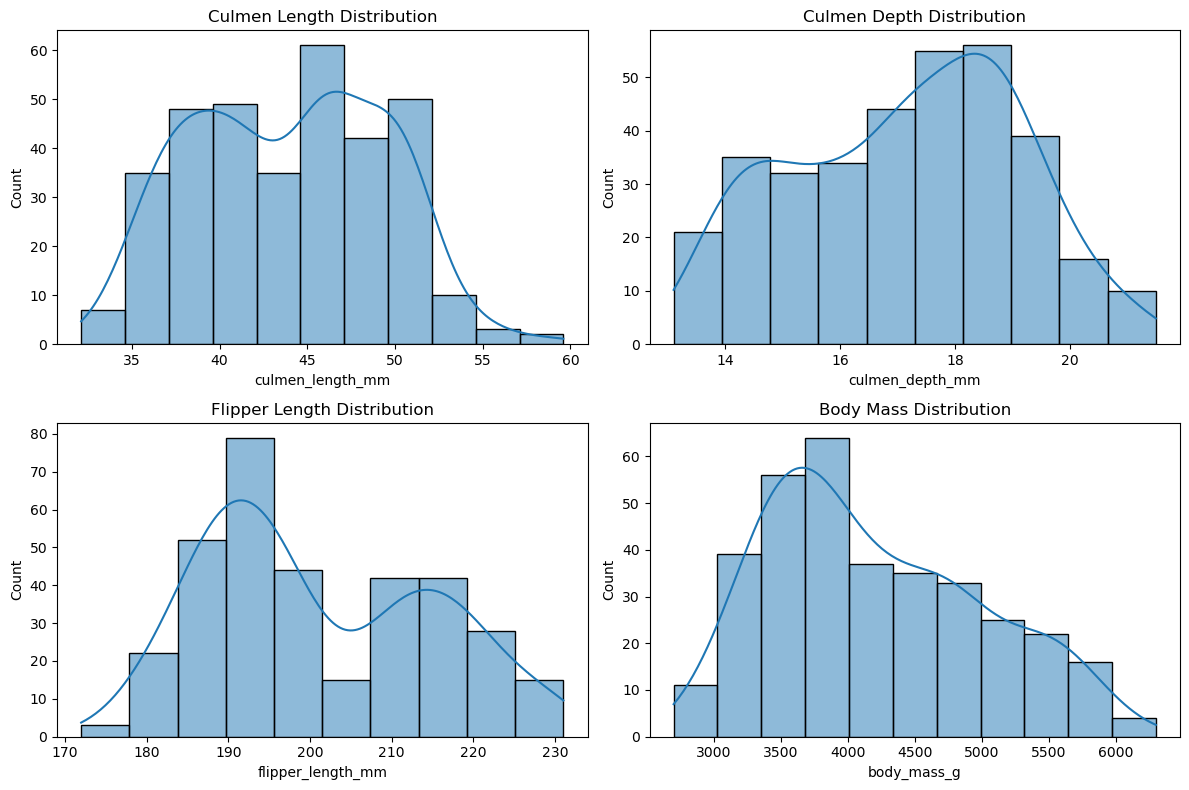

In [60]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['culmen_length_mm'], kde=True)
plt.title('Culmen Length Distribution')
plt.subplot(2, 2, 2)
sns.histplot(df['culmen_depth_mm'], kde=True)
plt.title('Culmen Depth Distribution')
plt.subplot(2, 2, 3)
sns.histplot(df['flipper_length_mm'], kde=True)
plt.title('Flipper Length Distribution')
plt.subplot(2, 2, 4)
sns.histplot(df['body_mass_g'], kde=True)
plt.title('Body Mass Distribution')
plt.tight_layout()
plt.show()


C:\Users\Shambhavi Pandey\miniconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


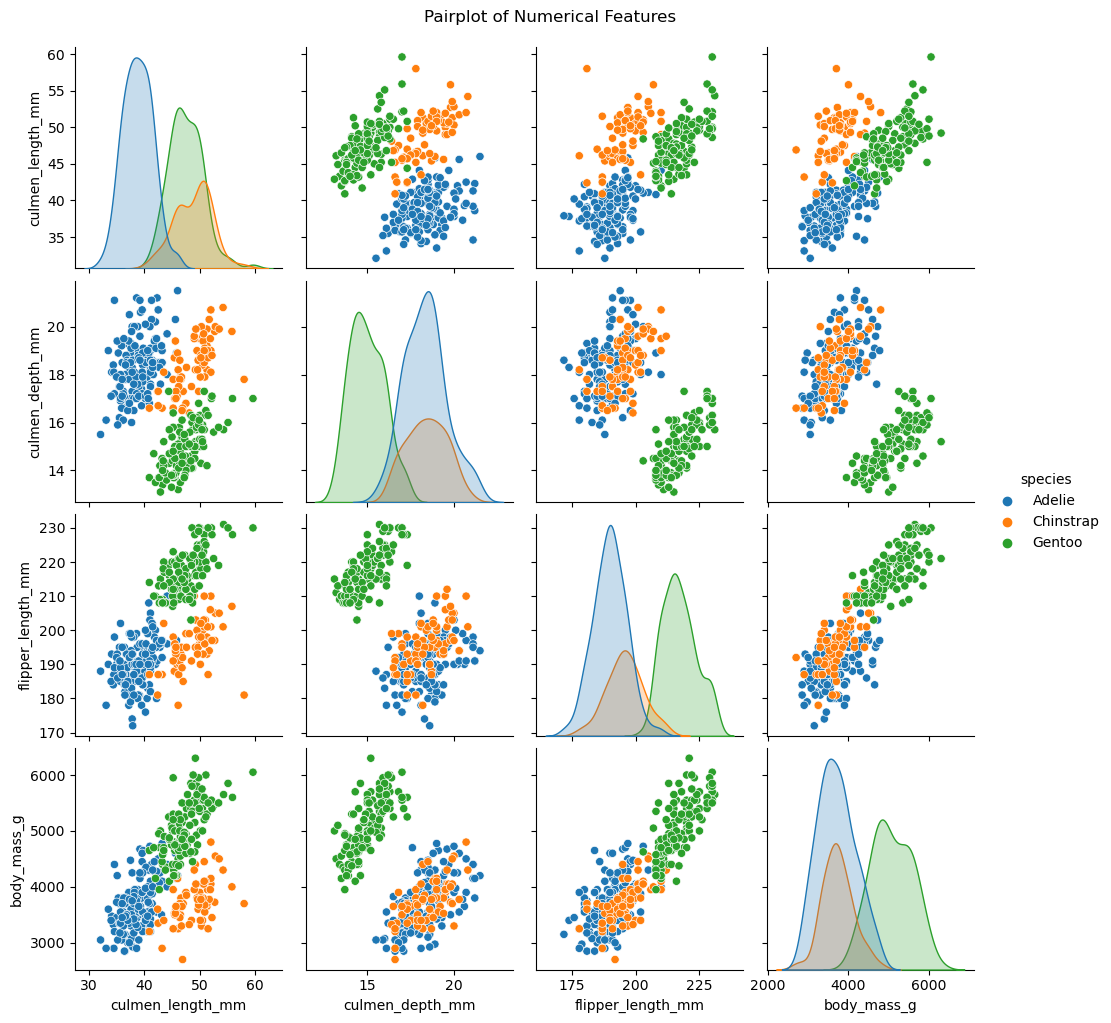

In [61]:
pairplot = sns.pairplot(df, hue='species')
pairplot.fig.suptitle('Pairplot of Numerical Features', y=1.02)  # Use `suptitle` to set the title
plt.show()


In [62]:
print(df.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [ ]:
print(df.isnull().sum())

In [ ]:
from scipy import stats

In [ ]:
z_scores = np.abs(stats.zscore(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]))
outliers = (z_scores > 3).all(axis=1)
df_no_outliers = df[~outliers]

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix['Species'].sort_values(ascending=False))

In [ ]:
categorical_cols = ['Island', 'Sex']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
X = df_encoded.drop('Species', axis=1)
y = df_encoded['Species']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))